In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
PATH = r"/home/db21160/Desktop/cat_dog_sub/test"
ds = image_dataset_from_directory(PATH,
                                  validation_split=0.2, subset="training",
                                  image_size=(256,256), interpolation="bilinear",
                                  crop_to_aspect_ratio=True,
                                  seed=42, shuffle=True, batch_size=10)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.


2025-04-08 14:48:20.955017: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


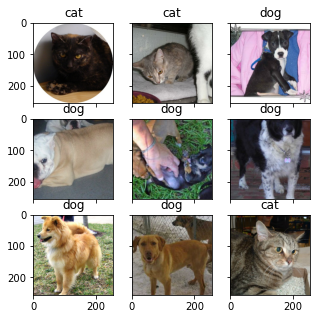

In [7]:
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(5,5))

for images, labels in ds.take(1):
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(images[i*3+j].numpy().astype("uint8"))
            ax[i][j].set_title(ds.class_names[labels[i*3+j]])
plt.show()

In [8]:
out_height, out_width = 128,256
resize = tf.keras.layers.Resizing(out_height, out_width)
height = tf.keras.layers.RandomHeight(0.3)
width = tf.keras.layers.RandomWidth(0.3)
zoom = tf.keras.layers.RandomZoom(0.3)

flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)

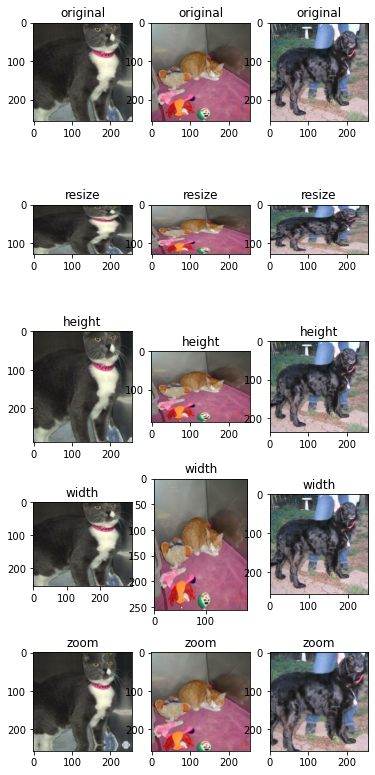

In [9]:
# Visualize images and augmentations
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):

    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")

        ax[1][i].imshow(resize(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("resize")

        ax[2][i].imshow(height(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("height")

        ax[3][i].imshow(width(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("width")

        ax[4][i].imshow(zoom(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("zoom")
plt.show()

2025-04-08 14:48:32.608669: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


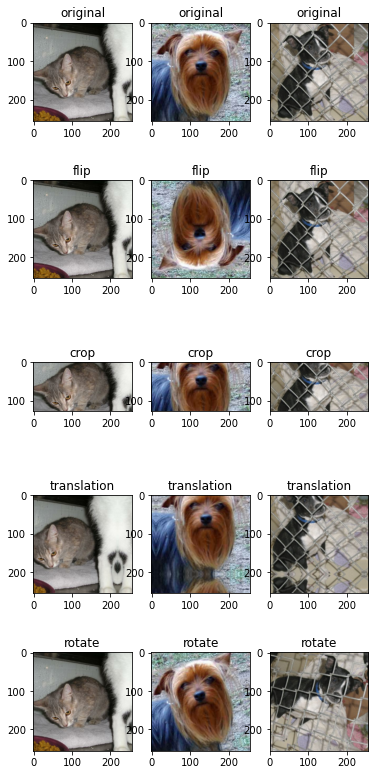

In [10]:
fig, ax = plt.subplots(5, 3, figsize=(6,14))
for images, labels in ds.take(1):
    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")
        
        ax[1][i].imshow(flip(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("flip")

        ax[2][i].imshow(crop(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("crop")

        ax[3][i].imshow(translation(images[i]).numpy().astype("uint8"))
        ax[3][i].set_title("translation")

        ax[4][i].imshow(rotate(images[i]).numpy().astype("uint8"))
        ax[4][i].set_title("rotate")
plt.show()

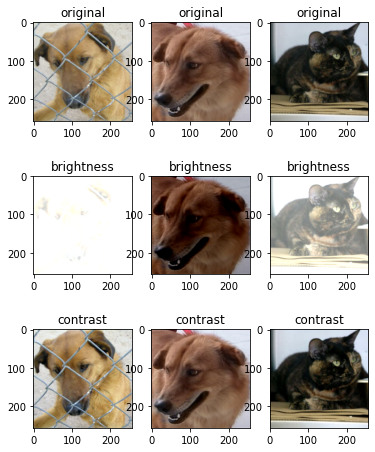

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(6,8))
for images, labels in ds.take(1):

    for i in range(3):
        ax[0][i].imshow(images[i].numpy().astype("uint8"))
        ax[0][i].set_title("original")

        ax[1][i].imshow(brightness(images[i]).numpy().astype("uint8"))
        ax[1][i].set_title("brightness")

        ax[2][i].imshow(contrast(images[i]).numpy().astype("uint8"))
        ax[2][i].set_title("contrast")
plt.show()